In [214]:
import numpy as np
import os
import random

TASK 1

In [215]:
artificial_train_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/train-artificial.csv", "rb"), 
                                   delimiter=",")
print(artificial_train_data.shape)

artificialR_train_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/trainR-artificial.csv", "rb"), 
                                   delimiter=",")
print(artificialR_train_data.shape)

crime_train_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/train-crime.csv", "rb"), 
                                   delimiter=",")
print(crime_train_data.shape)

crimeR_train_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/trainR-crime.csv", "rb"), 
                                   delimiter=",")
print(crimeR_train_data.shape)

(1000, 100)
(1000,)
(298, 100)
(298,)


In [216]:
artificial_test_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/test-artificial.csv", "rb"), 
                                   delimiter=",")
print(artificial_test_data.shape)

artificialR_test_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/testR-artificial.csv", "rb"), 
                                   delimiter=",")
print(artificialR_test_data.shape)

crime_test_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/test-crime.csv", "rb"), 
                                   delimiter=",")
print(crime_test_data.shape)

crimeR_test_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/testR-crime.csv", "rb"), 
                                   delimiter=",")
print(crimeR_test_data.shape)

(1000, 100)
(1000,)
(1695, 100)
(1695,)


In [217]:
def mse(w_vector, input_data, output_vector):
    mse = (np.square(np.matmul(input_data, w_vector) - output_vector))/input_data.shape[0]
    print('MSE on test set is ' + str(np.sum(mse)))
    print('--------------------------------')

In [218]:
frac = 1
length = int(round(artificial_train_data.shape[0]*frac))
print(length)
b = artificial_train_data[1:(length+1),:]
print(b.shape)

1000
(999, 100)


In [264]:
def model_selection_algo(frac, iterations, input_data, output_data):
    
    alpha=random.randint(1,10)
    beta=random.randint(1,10)
    print('fraction of training data used ' + str(frac))
#     print('starting alpha ' + str(alpha))
#     print('starting beta ' + str(beta))
    
    ctr = 0
    while ctr < iterations:
        
        eigen_vals = np.linalg.eigvals(np.multiply(beta, np.matmul(input_data.T, input_data)))
        gamma = np.sum(np.divide(eigen_vals, eigen_vals + alpha))
        
        beta_phiT_t = beta * np.matmul(input_data.T, output_data)
        beta_phiT_phi = np.multiply(beta, np.matmul(input_data.T, input_data))
        
        alpha_I = alpha * np.identity(input_data.shape[1])
        S_N_inv = alpha_I + beta_phiT_phi
        S_n = np.linalg.inv(S_N_inv)
        m_N = np.matmul(S_n, beta_phiT_t)
        alpha = gamma/np.matmul(m_N.T, m_N)
        
        one_over_beta = np.sum(np.square(output_data 
                        - np.matmul(input_data, m_N)))/(input_data.shape[0] - gamma)
        beta = 1/one_over_beta
        
        ctr = ctr + 1
#         print('alpha is ' + str(alpha))
#         print('beta is ' + str(beta))
#         print('gamma is ' + str(gamma))
#         print('----------- finished iteration ----------- ' + str(ctr))

    lambda_val = float(alpha)/float(beta)
    print('alpha is ' + str(alpha))
    print('beta is ' + str(beta))
    print('gamma is ' + str(gamma))
    print('lambda is ' + str(lambda_val))
    return m_N

(i) Model selection algo for alpha, beta and lambda on two training sets at various fractions

In [257]:
m_N = model_selection_algo(0.1, 100, artificial_train_data, artificialR_train_data)
mse(m_N, artificial_test_data, artificialR_test_data)
m_N = model_selection_algo(0.2, 100, artificial_train_data, artificialR_train_data)
mse(m_N, artificial_test_data, artificialR_test_data)
m_N = model_selection_algo(0.3, 100, artificial_train_data, artificialR_train_data)
mse(m_N, artificial_test_data, artificialR_test_data)
m_N = model_selection_algo(0.4, 100, artificial_train_data, artificialR_train_data)
mse(m_N, artificial_test_data, artificialR_test_data)
m_N = model_selection_algo(0.5, 100, artificial_train_data, artificialR_train_data)
mse(m_N, artificial_test_data, artificialR_test_data)
m_N = model_selection_algo(0.6, 100, artificial_train_data, artificialR_train_data)
mse(m_N, artificial_test_data, artificialR_test_data)
m_N = model_selection_algo(0.7, 100, artificial_train_data, artificialR_train_data)
mse(m_N, artificial_test_data, artificialR_test_data)
m_N = model_selection_algo(0.8, 100, artificial_train_data, artificialR_train_data)
mse(m_N, artificial_test_data, artificialR_test_data)
m_N = model_selection_algo(0.9, 100, artificial_train_data, artificialR_train_data)
mse(m_N, artificial_test_data, artificialR_test_data)
m_N = model_selection_algo(1.0, 100, artificial_train_data, artificialR_train_data)
mse(m_N, artificial_test_data, artificialR_test_data)

fraction of training data used 0.1
alpha is 10.285792553266644
beta is 1.8603093653179787
gamma is 93.19441347804141
lambda is 5.52907637032
MSE on test set is 0.6083085922060165
--------------------------------
fraction of training data used 0.2
alpha is 10.285792553266232
beta is 1.8603093653179856
gamma is 93.19441347804145
lambda is 5.52907637032
MSE on test set is 0.6083085922060403
--------------------------------
fraction of training data used 0.3
alpha is 10.285792553266802
beta is 1.8603093653179754
gamma is 93.19441347804123
lambda is 5.52907637032
MSE on test set is 0.6083085922060322
--------------------------------
fraction of training data used 0.4
alpha is 10.2857925532663
beta is 1.8603093653179845
gamma is 93.19441347804107
lambda is 5.52907637032
MSE on test set is 0.6083085922060267
--------------------------------
fraction of training data used 0.5
alpha is 10.285792553266802
beta is 1.8603093653179754
gamma is 93.19441347804123
lambda is 5.52907637032
MSE on test s

In [221]:
m_N = model_selection_algo(0.1, 100, crime_train_data, crimeR_train_data)
mse(m_N, crime_train_data, crimeR_train_data)
m_N = model_selection_algo(0.2, 100, crime_train_data, crimeR_train_data)
mse(m_N, crime_train_data, crimeR_train_data)
m_N = model_selection_algo(0.3, 100, crime_train_data, crimeR_train_data)
mse(m_N, crime_train_data, crimeR_train_data)
m_N = model_selection_algo(0.4, 100, crime_train_data, crimeR_train_data)
mse(m_N, crime_train_data, crimeR_train_data)
m_N = model_selection_algo(0.5, 100, crime_train_data, crimeR_train_data)
mse(m_N, crime_train_data, crimeR_train_data)
m_N = model_selection_algo(0.6, 100, crime_train_data, crimeR_train_data)
mse(m_N, crime_train_data, crimeR_train_data)
m_N = model_selection_algo(0.7, 100, crime_train_data, crimeR_train_data)
mse(m_N, crime_train_data, crimeR_train_data)
m_N = model_selection_algo(0.8, 100, crime_train_data, crimeR_train_data)
mse(m_N, crime_train_data, crimeR_train_data)
m_N = model_selection_algo(0.9, 100, crime_train_data, crimeR_train_data)
mse(m_N, crime_train_data, crimeR_train_data)
m_N = model_selection_algo(1.0, 100, crime_train_data, crimeR_train_data)
mse(m_N, crime_train_data, crimeR_train_data)

fraction of training data used 0.1
alpha is 425.645363868256
beta is 3.250432066425581
gamma is 29.17432011209978
lambda is 130.950395261
MSE on test set is 0.2775322106427774
--------------------------------
fraction of training data used 0.2
alpha is 425.64536386825637
beta is 3.25043206642558
gamma is 29.17432011209978
lambda is 130.950395261
MSE on test set is 0.27753221064277744
--------------------------------
fraction of training data used 0.3
alpha is 425.64536386825694
beta is 3.2504320664255797
gamma is 29.174320112099775
lambda is 130.950395261
MSE on test set is 0.27753221064277744
--------------------------------
fraction of training data used 0.4
alpha is 425.64536386825534
beta is 3.2504320664255815
gamma is 29.17432011209978
lambda is 130.950395261
MSE on test set is 0.27753221064277733
--------------------------------
fraction of training data used 0.5
alpha is 425.64536386825563
beta is 3.2504320664255815
gamma is 29.174320112099803
lambda is 130.950395261
MSE on test

(ii) Comparison b/w model selection from above part (i) and maximum likelihood computed below:

In [222]:
def maxlikelihood(frac, input_data, output_data):
    
    length = int(round(input_data.shape[0]*frac))
    input_data = input_data[1:(length+1),:]
    output_data = output_data[1:(length+1),]
    
    phiT_phi_inv = np.linalg.inv(np.matmul(input_data.T, input_data))
    phiT_t = np.matmul(input_data.T, output_data)
    maxL_w = np.matmul(phiT_phi_inv, phiT_t)
    print(maxL_w.shape)
    return maxL_w

In [223]:
maxL_w = maxlikelihood(0.1, artificial_train_data, artificialR_train_data)
mse(maxL_w, artificial_test_data, artificialR_test_data)
maxL_w = maxlikelihood(0.2, artificial_train_data, artificialR_train_data)
mse(maxL_w, artificial_test_data, artificialR_test_data)
maxL_w = maxlikelihood(0.3, artificial_train_data, artificialR_train_data)
mse(maxL_w, artificial_test_data, artificialR_test_data)
maxL_w = maxlikelihood(0.4, artificial_train_data, artificialR_train_data)
mse(maxL_w, artificial_test_data, artificialR_test_data)
maxL_w = maxlikelihood(0.5, artificial_train_data, artificialR_train_data)
mse(maxL_w, artificial_test_data, artificialR_test_data)
maxL_w = maxlikelihood(0.6, artificial_train_data, artificialR_train_data)
mse(maxL_w, artificial_test_data, artificialR_test_data)
maxL_w = maxlikelihood(0.7, artificial_train_data, artificialR_train_data)
mse(maxL_w, artificial_test_data, artificialR_test_data)
maxL_w = maxlikelihood(0.8, artificial_train_data, artificialR_train_data)
mse(maxL_w, artificial_test_data, artificialR_test_data)
maxL_w = maxlikelihood(0.9, artificial_train_data, artificialR_train_data)
mse(maxL_w, artificial_test_data, artificialR_test_data)
maxL_w = maxlikelihood(1.0, artificial_train_data, artificialR_train_data)
mse(maxL_w, artificial_test_data, artificialR_test_data)

(100,)
MSE on test set is 219.09627478398653
--------------------------------
(100,)
MSE on test set is 1.0489853386182555
--------------------------------
(100,)
MSE on test set is 0.8294837270042104
--------------------------------
(100,)
MSE on test set is 0.751892119834059
--------------------------------
(100,)
MSE on test set is 0.7099640365927068
--------------------------------
(100,)
MSE on test set is 0.6714748978108145
--------------------------------
(100,)
MSE on test set is 0.6401553320837808
--------------------------------
(100,)
MSE on test set is 0.6223892700422049
--------------------------------
(100,)
MSE on test set is 0.6198923637965243
--------------------------------
(100,)
MSE on test set is 0.6173367234489231
--------------------------------


In [224]:
maxL_w = maxlikelihood(0.1, crime_train_data, crimeR_train_data)
mse(maxL_w, crime_test_data, crimeR_test_data)
maxL_w = maxlikelihood(0.2, crime_train_data, crimeR_train_data)
mse(maxL_w, crime_test_data, crimeR_test_data)
maxL_w = maxlikelihood(0.3, crime_train_data, crimeR_train_data)
mse(maxL_w, crime_test_data, crimeR_test_data)
maxL_w = maxlikelihood(0.4, crime_train_data, crimeR_train_data)
mse(maxL_w, crime_test_data, crimeR_test_data)
maxL_w = maxlikelihood(0.5, crime_train_data, crimeR_train_data)
mse(maxL_w, crime_test_data, crimeR_test_data)
maxL_w = maxlikelihood(0.6, crime_train_data, crimeR_train_data)
mse(maxL_w, crime_test_data, crimeR_test_data)
maxL_w = maxlikelihood(0.7, crime_train_data, crimeR_train_data)
mse(maxL_w, crime_test_data, crimeR_test_data)
maxL_w = maxlikelihood(0.8, crime_train_data, crimeR_train_data)
mse(maxL_w, crime_test_data, crimeR_test_data)
maxL_w = maxlikelihood(0.9, crime_train_data, crimeR_train_data)
mse(maxL_w, crime_test_data, crimeR_test_data)
maxL_w = maxlikelihood(1.0, crime_train_data, crimeR_train_data)
mse(maxL_w, crime_test_data, crimeR_test_data)

(100,)
MSE on test set is 7748.37962307881
--------------------------------
(100,)
MSE on test set is 193070.52962084528
--------------------------------
(100,)
MSE on test set is 13605.865223840348
--------------------------------
(100,)
MSE on test set is 3.3447501625005955
--------------------------------
(100,)
MSE on test set is 1.1173352915783692
--------------------------------
(100,)
MSE on test set is 0.7724557564846328
--------------------------------
(100,)
MSE on test set is 0.5964353667182205
--------------------------------
(100,)
MSE on test set is 0.6120585236592089
--------------------------------
(100,)
MSE on test set is 0.5264312354884497
--------------------------------
(100,)
MSE on test set is 0.502799211091656
--------------------------------


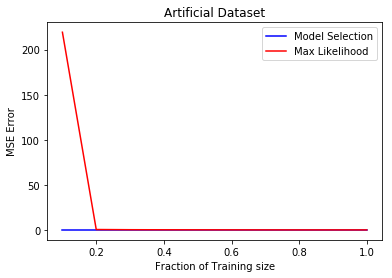

In [225]:
import matplotlib.pyplot as plt

artificial_model_selection = [0.6083085922060267, 0.6083085922060112, 0.6083085922060267,
                             0.6083085922060112,0.6083085922060112,0.6083085922060112,
                             0.6083085922060267,0.6083085922060267,0.6083085922060267,
                             0.6083085922060322]
frac_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

maxlikelihood = [219.09627478398653, 1.0489853386182555,0.8294837270042104,
                0.751892119834059,0.7099640365927068,0.6714748978108145,
                0.6401553320837808,0.6223892700422049,0.6198923637965243,
                0.6173367234489231]

plt.ylabel('MSE Error')
plt.xlabel('Fraction of Training size')
plt.title('Artificial Dataset')
plt.plot(frac_list, artificial_model_selection, color='b', label='Model Selection')
plt.plot(frac_list, maxlikelihood, color='r', label='Max Likelihood')
plt.legend(loc='best')
plt.show()

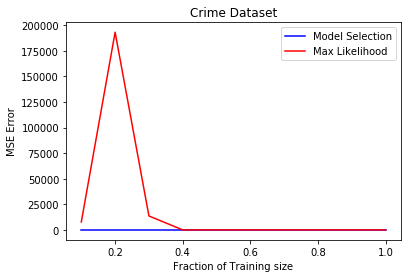

In [226]:
import matplotlib.pyplot as plt

frac_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

maxlikelihood = [7748.37962307881, 193070.52962084528, 13605.865223840348,
                3.3447501625005955,1.1173352915783692,0.7724557564846328,
                0.5964353667182205,0.6120585236592089,0.5264312354884497,
                0.502799211091656]

crime_model_selection = [0.2775322106427774,0.2775322106427774,0.27753221064277733,
                        0.27753221064277733,0.27753221064277733,0.27753221064277733,
                        0.27753221064277744,0.2775322106427774,0.2775322106427774,
                        0.27753221064277733]

plt.ylabel('MSE Error')
plt.xlabel('Fraction of Training size')
plt.title('Crime Dataset')
plt.plot(frac_list, crime_model_selection, color='b', label='Model Selection')
plt.plot(frac_list, maxlikelihood, color='r', label='Max Likelihood')
plt.legend(loc='best')
plt.show()

Model selection algorithm does a better job at finding the parameters as compared to the maximum likelihood.
The test MSE in case of model selection is lower than maximum likelihood for both datasets, artificial and crime.
The MSE decreases as we increase the fraction of training set size as more data is available.

Part (iii) with fixed lambda values of 1.0, 33.0 and 1000.0

In [227]:
def maxlikelihood_with_regularization(frac, lambda_val, input_data, output_data):
    
    length = int(round(input_data.shape[0]*frac))
    input_data = input_data[1:(length+1),:]
    output_data = output_data[1:(length+1),]
    
    regularization_matrix = lambda_val * np.identity(100)
    phiT_phi = np.matmul(input_data.T, input_data)
    sum1 = regularization_matrix + phiT_phi
    
    inv_matrix = np.linalg.inv(sum1)
    phiT_t = np.matmul(input_data.T, output_data)
    maxL_w = np.matmul(inv_matrix, phiT_t)
    print(maxL_w.shape)
    return maxL_w

For lambda = 1.0

In [228]:
regularized_w = maxlikelihood_with_regularization(0.1, 1.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.2, 1.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.3, 1.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.4, 1.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.5, 1.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.6, 1.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.7, 1.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.8, 1.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.9, 1.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(1.0, 1.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)

(100,)
MSE on test set is 1.2290474033452075
--------------------------------
(100,)
MSE on test set is 0.8991862510319194
--------------------------------
(100,)
MSE on test set is 0.7806496035368062
--------------------------------
(100,)
MSE on test set is 0.7265053038879681
--------------------------------
(100,)
MSE on test set is 0.698637068814467
--------------------------------
(100,)
MSE on test set is 0.6644615108060217
--------------------------------
(100,)
MSE on test set is 0.635930549664078
--------------------------------
(100,)
MSE on test set is 0.6193283755080519
--------------------------------
(100,)
MSE on test set is 0.6174127920644987
--------------------------------
(100,)
MSE on test set is 0.6151646731512826
--------------------------------


In [229]:
regularized_w = maxlikelihood_with_regularization(0.1, 1.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.2, 1.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.3, 1.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.4, 1.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.5, 1.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.6, 1.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.7, 1.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.8, 1.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.9, 1.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(1.0, 1.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)

(100,)
MSE on test set is 1.021635369499104
--------------------------------
(100,)
MSE on test set is 1.0601735486820354
--------------------------------
(100,)
MSE on test set is 0.9267826770574392
--------------------------------
(100,)
MSE on test set is 0.6977536041033683
--------------------------------
(100,)
MSE on test set is 0.5590435592709978
--------------------------------
(100,)
MSE on test set is 0.49873151358903733
--------------------------------
(100,)
MSE on test set is 0.472753190172272
--------------------------------
(100,)
MSE on test set is 0.506928181211111
--------------------------------
(100,)
MSE on test set is 0.4795581322614084
--------------------------------
(100,)
MSE on test set is 0.46202000148783373
--------------------------------


For lambda = 33.0

In [230]:
regularized_w = maxlikelihood_with_regularization(0.1, 33.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.2, 33.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.3, 33.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.4, 33.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.5, 33.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.6, 33.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.7, 33.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.8, 33.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.9, 33.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(1.0, 33.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)

(100,)
MSE on test set is 0.7302693604767547
--------------------------------
(100,)
MSE on test set is 0.6839366552300552
--------------------------------
(100,)
MSE on test set is 0.6337375431791149
--------------------------------
(100,)
MSE on test set is 0.6181233780712512
--------------------------------
(100,)
MSE on test set is 0.6255783857080763
--------------------------------
(100,)
MSE on test set is 0.6153643346511424
--------------------------------
(100,)
MSE on test set is 0.6071139870276429
--------------------------------
(100,)
MSE on test set is 0.6003922458802118
--------------------------------
(100,)
MSE on test set is 0.5985134375081659
--------------------------------
(100,)
MSE on test set is 0.5968944316616864
--------------------------------


In [231]:
regularized_w = maxlikelihood_with_regularization(0.1, 33.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.2, 33.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.3, 33.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.4, 33.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.5, 33.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.6, 33.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.7, 33.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.8, 33.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.9, 33.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(1.0, 33.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)

(100,)
MSE on test set is 0.4860036910906109
--------------------------------
(100,)
MSE on test set is 0.4575386244737143
--------------------------------
(100,)
MSE on test set is 0.4257517893863181
--------------------------------
(100,)
MSE on test set is 0.39524288222657533
--------------------------------
(100,)
MSE on test set is 0.39865845202315764
--------------------------------
(100,)
MSE on test set is 0.4145733411134556
--------------------------------
(100,)
MSE on test set is 0.39528393105322146
--------------------------------
(100,)
MSE on test set is 0.4017476009247869
--------------------------------
(100,)
MSE on test set is 0.3981470424226172
--------------------------------
(100,)
MSE on test set is 0.39163954549015656
--------------------------------


For lambda = 1000.0

In [232]:
regularized_w = maxlikelihood_with_regularization(0.1, 1000.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.2, 1000.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.3, 1000.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.4, 1000.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.5, 1000.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.6, 1000.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.7, 1000.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.8, 1000.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(0.9, 1000.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)
regularized_w = maxlikelihood_with_regularization(1.0, 1000.0, artificial_train_data, artificialR_train_data)
mse(regularized_w, artificial_test_data, artificialR_test_data)

(100,)
MSE on test set is 14.14606386175939
--------------------------------
(100,)
MSE on test set is 5.550127106783763
--------------------------------
(100,)
MSE on test set is 3.0823004323050154
--------------------------------
(100,)
MSE on test set is 2.1166016124310323
--------------------------------
(100,)
MSE on test set is 1.6554487218055152
--------------------------------
(100,)
MSE on test set is 1.4031800365166252
--------------------------------
(100,)
MSE on test set is 1.230556736489588
--------------------------------
(100,)
MSE on test set is 1.1288369058973633
--------------------------------
(100,)
MSE on test set is 1.0383639645656513
--------------------------------
(100,)
MSE on test set is 0.9772989785972215
--------------------------------


In [233]:
regularized_w = maxlikelihood_with_regularization(0.1, 1000.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.2, 1000.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.3, 1000.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.4, 1000.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.5, 1000.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.6, 1000.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.7, 1000.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.8, 1000.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(0.9, 1000.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)
regularized_w = maxlikelihood_with_regularization(1.0, 1000.0, crime_train_data, crimeR_train_data)
mse(regularized_w, crime_test_data, crimeR_test_data)

(100,)
MSE on test set is 0.6673538814418749
--------------------------------
(100,)
MSE on test set is 0.5822139446763883
--------------------------------
(100,)
MSE on test set is 0.5632987670683617
--------------------------------
(100,)
MSE on test set is 0.5262209353446086
--------------------------------
(100,)
MSE on test set is 0.5129549640069732
--------------------------------
(100,)
MSE on test set is 0.5056498837557861
--------------------------------
(100,)
MSE on test set is 0.48763754538062454
--------------------------------
(100,)
MSE on test set is 0.4775182200715409
--------------------------------
(100,)
MSE on test set is 0.4708227252207024
--------------------------------
(100,)
MSE on test set is 0.455427780216091
--------------------------------


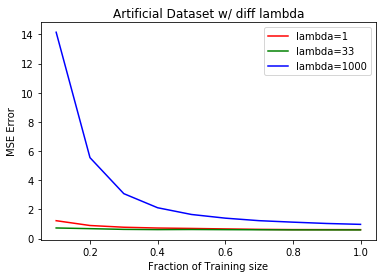

In [234]:
import matplotlib.pyplot as plt

lambda_1_artificial = [1.2290474033452075,0.8991862510319194,0.7806496035368062,0.7265053038879681,
                      0.698637068814467,0.6644615108060217,0.635930549664078,0.6193283755080519,
                      0.6174127920644987,0.6151646731512826]

lambda_33_artificial = [0.7302693604767547,0.6839366552300552,0.6337375431791149,0.6181233780712512,
                       0.6255783857080763,0.6153643346511424,0.6071139870276429,0.6003922458802118,
                       0.5985134375081659,0.5968944316616864]

lambda_1000_artificial = [14.14606386175939,5.550127106783763,3.0823004323050154,2.1166016124310323,
                         1.6554487218055152,1.4031800365166252,1.230556736489588,1.1288369058973633,
                         1.0383639645656513,0.9772989785972215]

frac_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

plt.ylabel('MSE Error')
plt.xlabel('Fraction of Training size')
plt.title('Artificial Dataset w/ diff lambda')
plt.plot(frac_list, lambda_1_artificial, color='r', label='lambda=1')
plt.plot(frac_list, lambda_33_artificial, color='g', label='lambda=33')
plt.plot(frac_list, lambda_1000_artificial, color='b', label='lambda=1000')
plt.legend(loc='best')
plt.show()

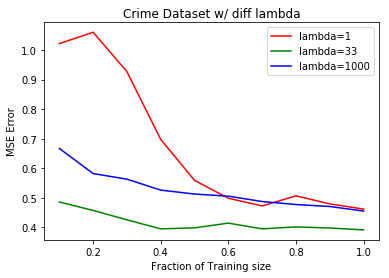

In [235]:
import matplotlib.pyplot as plt

lambda_1_crime = [1.021635369499104,1.0601735486820354,0.9267826770574392,0.6977536041033683,
                      0.5590435592709978,0.49873151358903733,0.472753190172272,0.506928181211111,
                      0.4795581322614084,0.46202000148783373]

lambda_33_crime = [0.4860036910906109,0.4575386244737143,0.4257517893863181,0.39524288222657533,
                       0.39865845202315764,0.4145733411134556,0.39528393105322146,0.4017476009247869,
                       0.3981470424226172,0.39163954549015656]

lambda_1000_crime = [0.6673538814418749,0.5822139446763883,0.5632987670683617,0.5262209353446086,
                         0.5129549640069732,0.5056498837557861,0.48763754538062454,0.4775182200715409,
                         0.4708227252207024,0.455427780216091]

frac_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

plt.ylabel('MSE Error')
plt.xlabel('Fraction of Training size')
plt.title('Crime Dataset w/ diff lambda')
plt.plot(frac_list, lambda_1_crime, color='r', label='lambda=1')
plt.plot(frac_list, lambda_33_crime, color='g', label='lambda=33')
plt.plot(frac_list, lambda_1000_crime, color='b', label='lambda=1000')
plt.legend(loc='best')
plt.show()

As can be seen from the two plots above,. a lambda value of 33.0 produces a low MSE for both artificial 
and crime datasets. For artificial dataset, the calculated value of lambda value is ~ 5.5 while for crime 
dataset the lambda value is ~ 130.95


TASK 2

In [347]:
f3_train_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/train-f3.csv", "rb"), 
                                   delimiter=",")
print(f3_train_data.shape)

f3R_train_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/trainR-f3.csv", "rb"), 
                                   delimiter=",")
print(f3R_train_data.shape)

f5_train_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/train-f5.csv", "rb"), 
                                   delimiter=",")
print(f5_train_data.shape)

f5R_train_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/trainR-f5.csv", "rb"), 
                                   delimiter=",")
print(f5R_train_data.shape)

(300,)
(300,)
(300,)
(300,)


In [368]:
f3_test_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/test-f3.csv", "rb"), 
                                   delimiter=",")
print(f3_test_data.shape)

f3R_test_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/testR-f3.csv", "rb"), 
                                   delimiter=",")
print(f3R_test_data.shape)

f5_test_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/test-f5.csv", "rb"), 
                                   delimiter=",")
print(f5_test_data.shape)

f5R_test_data = np.loadtxt(open("/Users/sahiltyagi/Downloads/pp2data/testR-f5.csv", "rb"), 
                                   delimiter=",")
print(f5R_test_data.shape)

(500,)
(500,)
(500,)
(500,)


In [369]:
import math

def degreelist(degree, x):
    
    degree_list = []
    degree_list.append(1)
    for d in range(1,degree + 1):
        degree_list.append(math.pow(x, d))
        
    return degree_list

In [370]:
def generate_training_data(degree, data):
    
    converted_data =  np.array([np.array(degreelist(degree, ix)) for ix in data])
        
    print(converted_data.shape)
    return converted_data

In [371]:
f3_train_data = generate_training_data(3, f3_train_data)

f5_train_data = generate_training_data(5, f5_train_data)

TypeError: only size-1 arrays can be converted to Python scalars

In [372]:
f3_test_data = generate_training_data(3, f3_test_data)

f5_test_data = generate_training_data(5, f5_test_data)

(500, 4)
(500, 6)


In [373]:
def model_selection_algo_task2(frac, iterations, input_data, output_data):
    
    alpha=random.randint(1,10)
    beta=random.randint(1,10)
    print('fraction of training data used ' + str(frac))
    print('starting alpha ' + str(alpha))
    print('starting beta ' + str(beta))
    
    ctr = 0
    while ctr < iterations:
        
        eigen_vals = np.linalg.eigvals(np.multiply(beta, np.matmul(input_data.T, input_data)))
        #print(eigen_vals.shape)
        gamma = np.sum(np.divide(eigen_vals, eigen_vals + alpha))
        
        beta_phiT_t = beta * np.matmul(input_data.T, output_data)
        beta_phiT_phi = np.multiply(beta, np.matmul(input_data.T, input_data))
        
        alpha_I = alpha * np.identity(input_data.shape[1])
        S_N_inv = alpha_I + beta_phiT_phi
        S_n = np.linalg.inv(S_N_inv)
        #print(S_n.shape)
        m_N = np.matmul(S_n, beta_phiT_t)
        #print(m_N.shape)
        alpha = gamma/np.matmul(m_N.T, m_N)
        
        one_over_beta = np.sum(np.square(output_data 
                        - np.matmul(input_data, m_N)))/(input_data.shape[0] - gamma)
        beta = 1/one_over_beta
        
        ctr = ctr + 1
#         print('alpha is ' + str(alpha))
#         print('beta is ' + str(beta))
#         print('gamma is ' + str(gamma))
#         print('----------- finished iteration ----------- ' + str(ctr))

    lambda_val = float(alpha)/float(beta)
    print('alpha is ' + str(alpha))
    print('beta is ' + str(beta))
    print('gamma is ' + str(gamma))
    print('lambda is ' + str(lambda_val))
    return alpha, beta, m_N

In [374]:
import math

def log_evidence(alpha, beta, M, input_data, m_N):
    
    A_det = np.linalg.det(alpha*np.identity(input_data.shape[1]) + beta * np.matmul(input_data.T, input_data))
    
    log_evidence = (M * math.log(alpha))/2 + (input_data.shape[0] * math.log(beta))/2 - np.mean(m_N) 
    - math.log(A_det)/2 -(input_data.shape[0] * math.log(math.pi))/2
    
    print('log evidence is ' + str(log_evidence))

In [375]:
degrees = [1,2,3,4,5,6,7,8,9,10]
for d in degrees:
    
    alpha, beta, m_N = model_selection_algo_task2(1.0, 100, f5_train_data, f5R_train_data)
    log_evidence(alpha, beta, d+1, f5_train_data, m_N)
    mse(m_N, f5_test_data, f5R_test_data)

fraction of training data used 1.0
starting alpha 10
starting beta 4
alpha is 0.03861725072656692
beta is 2.352090298642966e-07
gamma is 3.5990977895202025
lambda is 164182.687837
log evidence is -2292.1749495897593
MSE on test set is 54265.21239617393
--------------------------------
fraction of training data used 1.0
starting alpha 1
starting beta 4
alpha is 0.03861725090059268
beta is 2.3520902985142547e-07
gamma is 3.5990978056915406
lambda is 164182.688585
log evidence is -2293.8019776873066
MSE on test set is 54265.21239660112
--------------------------------
fraction of training data used 1.0
starting alpha 8
starting beta 4
alpha is 0.03861725075192533
beta is 2.352090298624216e-07
gamma is 3.599097791619316
lambda is 164182.687946
log evidence is -2295.4290057818234
MSE on test set is 54265.2123933514
--------------------------------
fraction of training data used 1.0
starting alpha 1
starting beta 7
alpha is 0.03861725082131101
beta is 2.3520902985728826e-07
gamma is 3.599097

In [382]:
def maxlikelihood_task2(input_data, output_data):
    
    phiT_phi_inv = np.linalg.inv(np.matmul(input_data.T, input_data))
    phiT_t = np.matmul(input_data.T, output_data)
    maxL_w = np.matmul(phiT_phi_inv, phiT_t)
    print(maxL_w.shape)
    return maxL_w

In [384]:
degrees = [1,2,3,4,5,6,7,8,9,10]
for d in degrees:
    print('polynomial degree is ' + str(d))
    weight_vector = maxlikelihood_task2(f5_train_data, f5R_train_data)
    mse(weight_vector, f5_test_data, f5R_test_data)

polynomial degree is 1
(6,)
MSE on test set is 61375.34506062618
--------------------------------
polynomial degree is 2
(6,)
MSE on test set is 61375.34506062618
--------------------------------
polynomial degree is 3
(6,)
MSE on test set is 61375.34506062618
--------------------------------
polynomial degree is 4
(6,)
MSE on test set is 61375.34506062618
--------------------------------
polynomial degree is 5
(6,)
MSE on test set is 61375.34506062618
--------------------------------
polynomial degree is 6
(6,)
MSE on test set is 61375.34506062618
--------------------------------
polynomial degree is 7
(6,)
MSE on test set is 61375.34506062618
--------------------------------
polynomial degree is 8
(6,)
MSE on test set is 61375.34506062618
--------------------------------
polynomial degree is 9
(6,)
MSE on test set is 61375.34506062618
--------------------------------
polynomial degree is 10
(6,)
MSE on test set is 61375.34506062618
--------------------------------


In [377]:
degrees = [1,2,3,4,5,6,7,8,9,10]
for d in degrees:
    print('polynomial degree is ' + str(d))
    alpha, beta, m_N  = model_selection_algo_task2(1.0, 100, f3_train_data, f3R_train_data)
    log_evidence(alpha, beta, d+1, f5_train_data, m_N)
    mse(m_N, f3_test_data, f3R_test_data)

polynomial degree is 1
fraction of training data used 1.0
starting alpha 5
starting beta 8
alpha is 0.009990132011889006
beta is 2.450953376955573e-07
gamma is 2.0697211312579964
lambda is 40760.1878755
log evidence is -2290.487656572904
MSE on test set is 67744.90607087497
--------------------------------
polynomial degree is 2
fraction of training data used 1.0
starting alpha 5
starting beta 9
alpha is 0.009990132011889006
beta is 2.450953376955573e-07
gamma is 2.0697211312579964
lambda is 40760.1878755
log evidence is -2292.790735308907
MSE on test set is 67744.90607087497
--------------------------------
polynomial degree is 3
fraction of training data used 1.0
starting alpha 4
starting beta 5
alpha is 0.009990132011890989
beta is 2.450953376955569e-07
gamma is 2.069721131258332
lambda is 40760.1878755
log evidence is -2295.0938140449093
MSE on test set is 67744.90607087524
--------------------------------
polynomial degree is 4
fraction of training data used 1.0
starting alpha 3
s

In [385]:
degrees = [1,2,3,4,5,6,7,8,9,10]
for d in degrees:
    print('polynomial degree is ' + str(d))
    weight_vector = maxlikelihood_task2(f3_train_data, f3R_train_data)
    mse(weight_vector, f3_test_data, f3R_test_data)

polynomial degree is 1
(4,)
MSE on test set is 148429.38836498046
--------------------------------
polynomial degree is 2
(4,)
MSE on test set is 148429.38836498046
--------------------------------
polynomial degree is 3
(4,)
MSE on test set is 148429.38836498046
--------------------------------
polynomial degree is 4
(4,)
MSE on test set is 148429.38836498046
--------------------------------
polynomial degree is 5
(4,)
MSE on test set is 148429.38836498046
--------------------------------
polynomial degree is 6
(4,)
MSE on test set is 148429.38836498046
--------------------------------
polynomial degree is 7
(4,)
MSE on test set is 148429.38836498046
--------------------------------
polynomial degree is 8
(4,)
MSE on test set is 148429.38836498046
--------------------------------
polynomial degree is 9
(4,)
MSE on test set is 148429.38836498046
--------------------------------
polynomial degree is 10
(4,)
MSE on test set is 148429.38836498046
--------------------------------


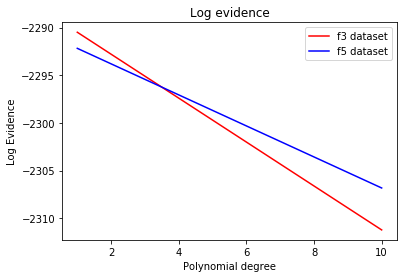

In [378]:
import matplotlib.pyplot as plt

degree_list = [1,2,3,4,5,6,7,8,9,10]

f5_logevidence = [-2292.17494959177,-2293.80197,-2295.429005,-2297.0560338,-2298.6830619,-2300.310090064,
                 -2301.937118159,-2303.56414625,-2305.19117435,-2306.818202]


f3_logevidence = [-2290.4876565,-2292.79073530,-2295.0938140,-2297.396892780,-2299.6999715169,-2302.0030502,
                 -2304.3061289,-2306.60920772,-2308.9122864,-2311.21536519]

plt.ylabel('Log Evidence')
plt.xlabel('Polynomial degree')
plt.title('Log evidence')
plt.plot(degree_list, f3_logevidence, color='r', label='f3 dataset')
plt.plot(degree_list, f5_logevidence, color='b', label='f5 dataset')
plt.legend(loc='best')
plt.show()

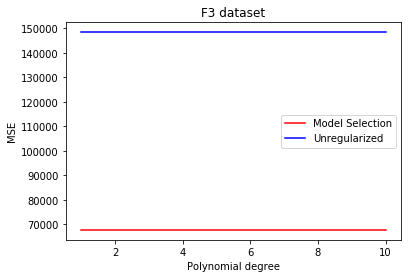

In [386]:
import matplotlib.pyplot as plt

degree_list = [1,2,3,4,5,6,7,8,9,10]

f3_mse = [67744.90607087356,67744.9060708752,67744.90607087433,67744.90607087356,
         67744.90607087356,67744.9060708752,67744.90607087497,67744.90607087387,
         67744.90607087497,67744.90607087428]

f3_non_regularized = [148429.38836498046,148429.38836498046,148429.38836498046,148429.38836498046,
                     148429.38836498046,148429.38836498046,148429.38836498046,148429.38836498046,
                     148429.38836498046,148429.38836498046]

plt.ylabel('MSE')
plt.xlabel('Polynomial degree')
plt.title('F3 dataset')
plt.plot(degree_list, f3_mse, color='r', label='Model Selection')
plt.plot(degree_list, f3_non_regularized, color='b', label='Unregularized')
plt.legend(loc='best')
plt.show()

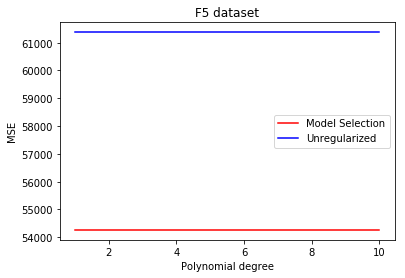

In [387]:
import matplotlib.pyplot as plt

f5_mse = [54265.21239631191,54265.21239548846,54265.21239334888,54265.21239631642,
         54265.21239470695,54265.21239458315,54265.212391384106,54265.21239458315,
         54265.212395166396,54265.212393832546]

f5_non_regularized = [61375.34506062618,61375.34506062618,61375.34506062618,61375.34506062618,61375.34506062618,
                     61375.34506062618,61375.34506062618,61375.34506062618,61375.34506062618,61375.34506062618]

plt.ylabel('MSE')
plt.xlabel('Polynomial degree')
plt.title('F5 dataset')
plt.plot(degree_list, f5_mse, color='r', label='Model Selection')
plt.plot(degree_list, f5_non_regularized, color='b', label='Unregularized')
plt.legend(loc='best')
plt.show()

The non-regularized model has more error MSE in both the f3 and f5 datasets